In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network_builder import NoRecurrenceWeights, RandomSymmetricConnectivityWeights, SymmetricRingStructureWeights, BalanceRingStructureWeights, ImbalanceRingStructureWeights, plot_weights
from network_functions import NetworkExecuter, decoder, decoding_error
from tqdm import tqdm

# Question 1

In [2]:
model1 = NoRecurrenceWeights()
model2 = RandomSymmetricConnectivityWeights()
model3 = SymmetricRingStructureWeights()
model4 = BalanceRingStructureWeights()

weights1 = model1.get_weights()
weights2 = model2.get_weights()
weights3 = model3.get_weights()
weights4 = model4.get_weights()

executioner1 = NetworkExecuter(W=weights1)
executioner2 = NetworkExecuter(W=weights2)
executioner3 = NetworkExecuter(W=weights3)

B = np.eye(400, 200)
C = np.eye(200, 400)
executioner4 = NetworkExecuter(W=weights4, B=B, C=C)

In [113]:
def plot_response(executioner, ts=[0.01, 0.05, 0.1, 0.2], title=""):
    orientation = np.pi
    for t in ts:
        rate = executioner.euler(t, orientation)
        plt.plot(executioner.pref, rate, label=f"r(t) at {t} seconds")
    plt.title(title)
    plt.xlabel("Preferred Orientation")
    plt.ylabel("Rate/Hz")
    plt.legend()
    plt.show()

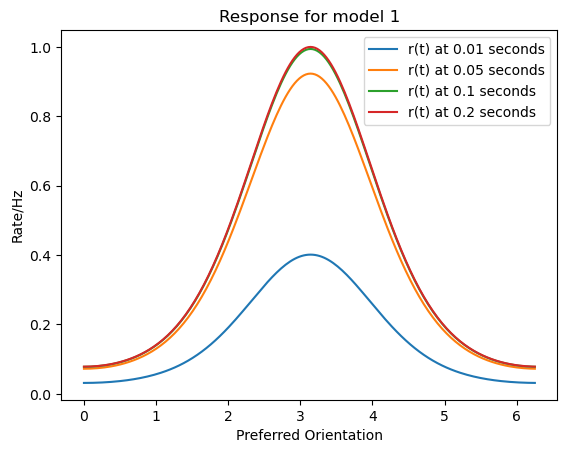

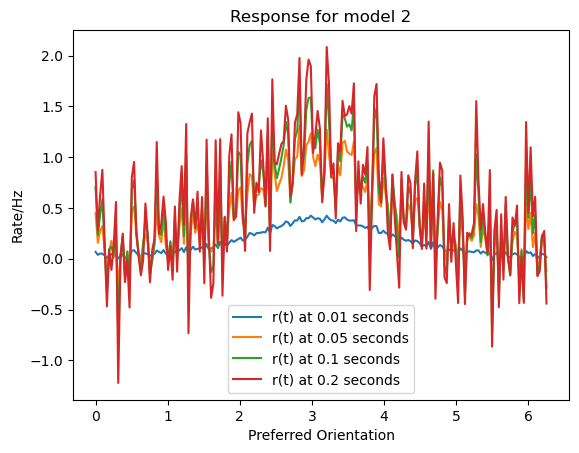

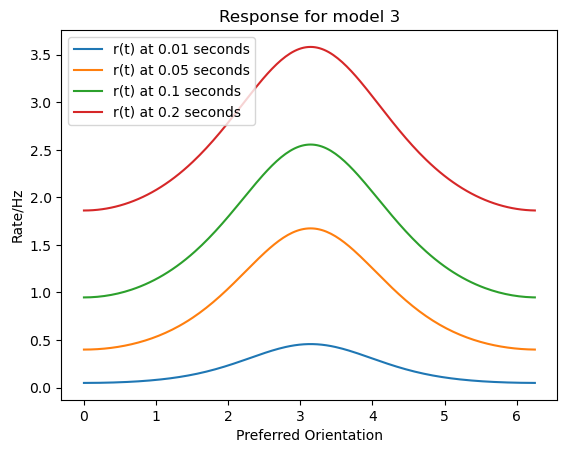

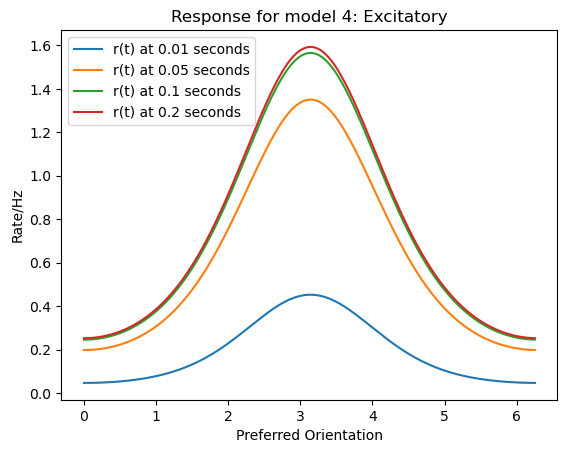

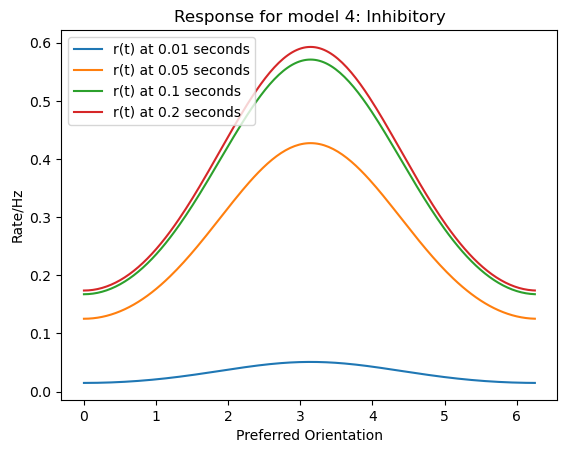

In [97]:
executioners = [executioner1, executioner2, executioner3]

orientation = np.pi
ts = [0.01, 0.05, 0.1, 0.2]

for i, executioner in enumerate(executioners):
    for t in ts:
        rate = executioner.euler(t, orientation)
        plt.plot(executioner.pref, rate, label=f"r(t) at {t} seconds")
    plt.title(f"Response for model {i + 1}")
    plt.xlabel("Preferred Orientation")
    plt.ylabel("Rate/Hz")
    plt.legend()
    plt.show()

for t in ts:
    rate = executioner4.euler(t, orientation)
    plt.plot(executioner.pref, rate[:200], label=f"r(t) at {t} seconds")
plt.title(f"Response for model {3 + 1}: Excitatory")
plt.xlabel("Preferred Orientation")
plt.ylabel("Rate/Hz")
plt.legend()
plt.show()

for t in ts:
    rate = executioner4.euler(t, orientation)
    plt.plot(executioner.pref, rate[200:], label=f"r(t) at {t} seconds")
plt.title(f"Response for model {3 + 1}: Inhibitory")
plt.xlabel("Preferred Orientation")
plt.ylabel("Rate/Hz")
plt.legend()
plt.show()

# Question 2, 3, and 4

In [91]:
def sort_plot_eigen(weights, title=""):
    plt.figure(figsize=(10,6))
    eigenval = np.linalg.eigvals(weights)
    real = np.real(eigenval)
    real_sorted = np.sort(real)[::-1][:20]
    x = np.linspace(0, len(real_sorted), len(real_sorted))
    plt.title(title)
    plt.scatter(x, real_sorted, marker='x', s=100)
    plt.show()

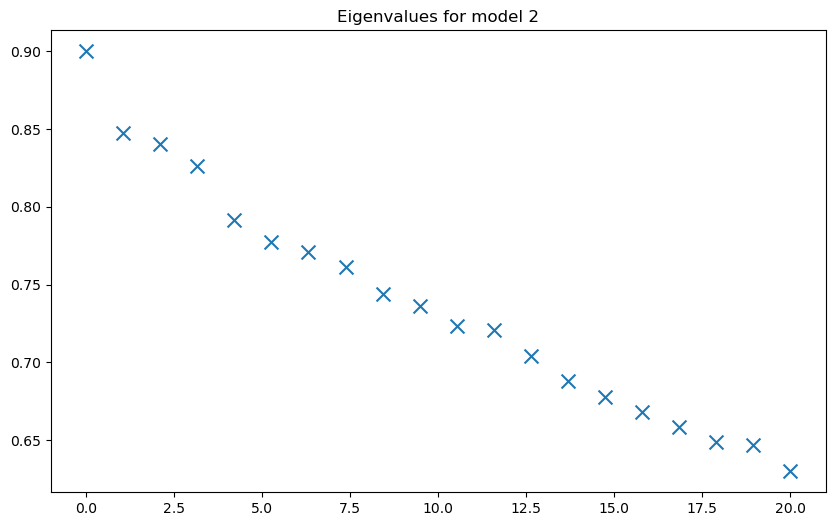

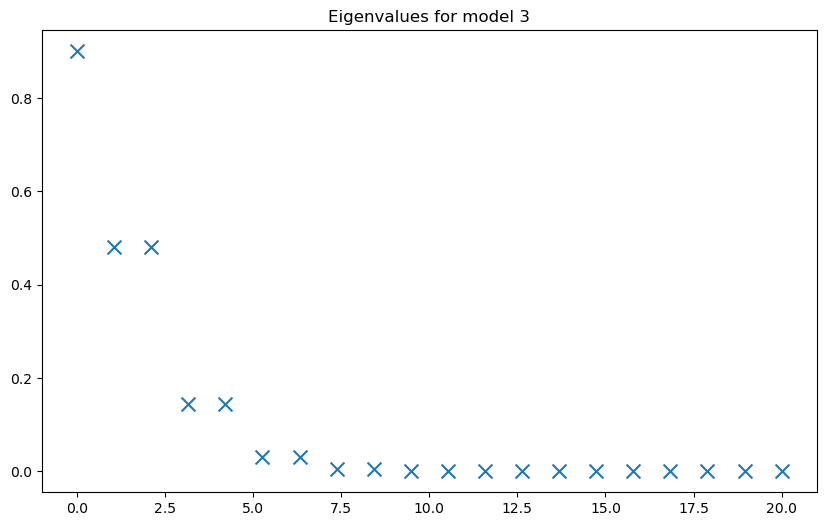

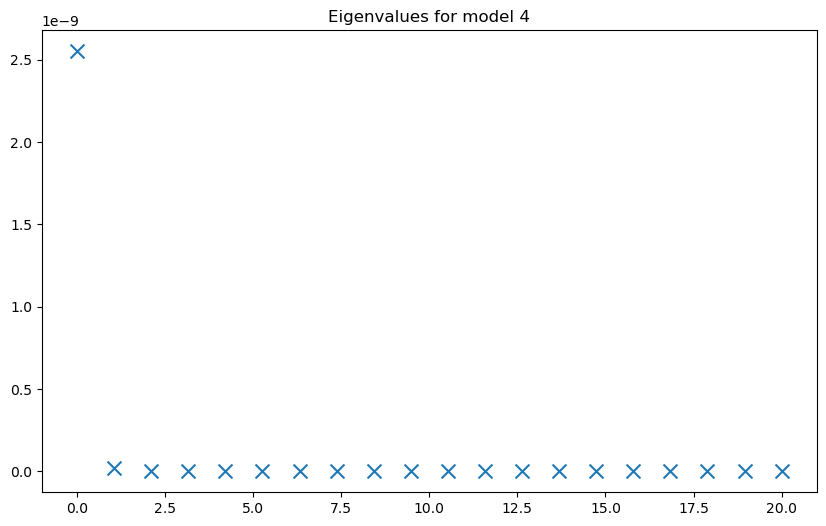

In [92]:
# sort_plot_eigen(weights1, title="Eigenvalues for model ")
sort_plot_eigen(weights2, title="Eigenvalues for model 2")
sort_plot_eigen(weights3, title="Eigenvalues for model 3")
sort_plot_eigen(weights4, title="Eigenvalues for model 4")

(0.8999999999999982+0j)


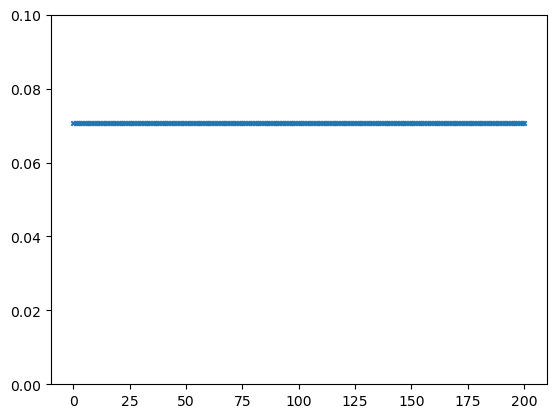

(1.71330222423424e-09+0j)


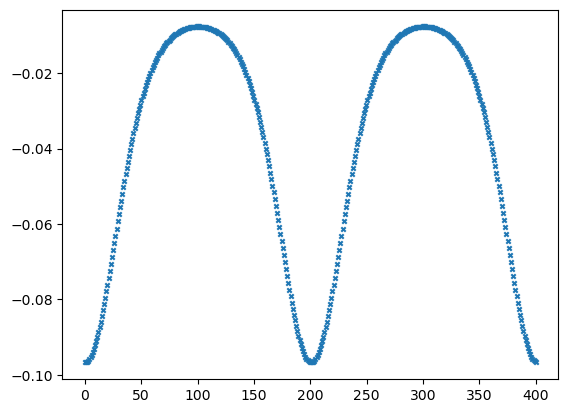

In [59]:
def max_eigenvector(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    positive_eigenvalues = eigenvalues[eigenvalues > 0]
    max_positive_eigenvalue_index = np.argmax(positive_eigenvalues)
    max_positive_eigenvalue = positive_eigenvalues[max_positive_eigenvalue_index]
    print(max_positive_eigenvalue)
    max_positive_eigenvector = eigenvectors[:, eigenvalues == max_positive_eigenvalue]
    return max_positive_eigenvector



max_vector = max_eigenvector(weights3)
x = np.linspace(0, len(max_vector), len(max_vector))
plt.ylim(0,0.1)
plt.scatter(x, max_vector, marker='x', s=10)
plt.show()

max_vector = max_eigenvector(weights4)
x = np.linspace(0, len(max_vector), len(max_vector))
plt.scatter(x, max_vector, marker='x', s=10)
plt.show()

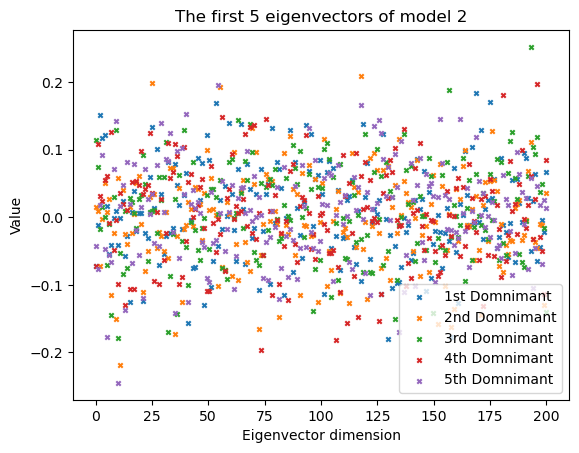

/Users/paopao_ch/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


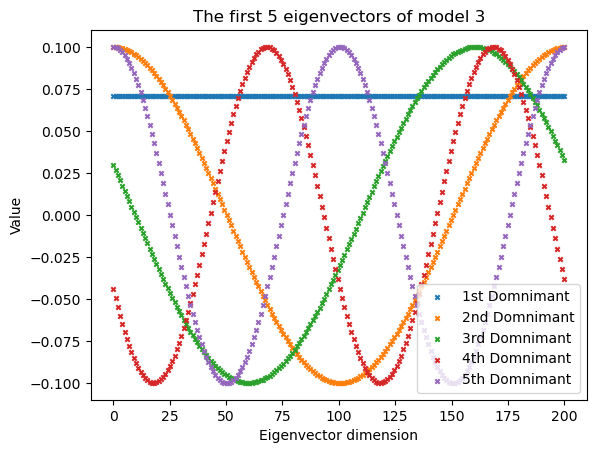

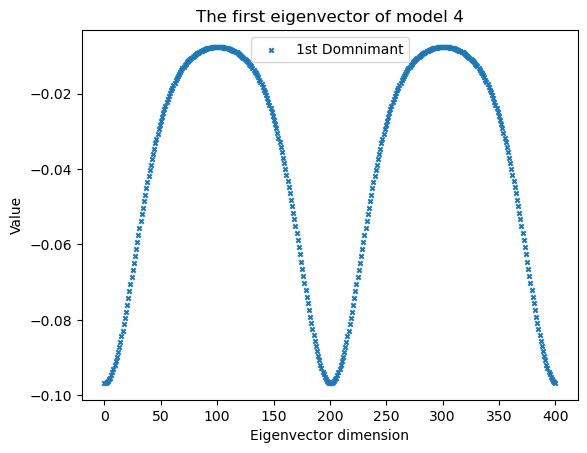

In [100]:
def top_eigenvectors(matrix, num_top_eigenvalues=5):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    top_eigenvalue_indices = sorted_indices[:num_top_eigenvalues]  # Take top n eigenvalue indices
    top_eigenvectors = eigenvectors[:, top_eigenvalue_indices]  # Corresponding eigenvectors
    return top_eigenvectors.transpose(1,0)

max_vector = top_eigenvectors(weights2)
x = np.linspace(0, len(max_vector[0]), len(max_vector[0]))
plt.scatter(x, max_vector[0], marker='x', s=10, label="1st Domnimant")
plt.scatter(x, max_vector[1], marker='x', s=10, label="2nd Domnimant")
plt.scatter(x, max_vector[2], marker='x', s=10, label="3rd Domnimant")
plt.scatter(x, max_vector[3], marker='x', s=10, label="4th Domnimant")
plt.scatter(x, max_vector[4], marker='x', s=10, label="5th Domnimant")
plt.title("The first 5 eigenvectors of model 2")
plt.xlabel("Eigenvector dimension")
plt.ylabel("Value")
plt.legend()
plt.show()

max_vector = top_eigenvectors(weights3)
x = np.linspace(0, len(max_vector[0]), len(max_vector[0]))
plt.scatter(x, max_vector[0], marker='x', s=10, label="1st Domnimant")
plt.scatter(x, max_vector[1], marker='x', s=10, label="2nd Domnimant")
plt.scatter(x, max_vector[2], marker='x', s=10, label="3rd Domnimant")
plt.scatter(x, max_vector[3], marker='x', s=10, label="4th Domnimant")
plt.scatter(x, max_vector[4], marker='x', s=10, label="5th Domnimant")
plt.title("The first 5 eigenvectors of model 3")
plt.xlabel("Eigenvector dimension")
plt.ylabel("Value")
plt.legend()
plt.show()

max_vector = top_eigenvectors(weights4)
x = np.linspace(0, len(max_vector[0]), len(max_vector[0]))
plt.scatter(x, max_vector[0], marker='x', s=10, label="1st Domnimant")
plt.title("The first eigenvector of model 4")
plt.xlabel("Eigenvector dimension")
plt.ylabel("Value")
plt.legend()
plt.show()

In [42]:
max_vector.shape

(200, 3)

# Question 5

In [61]:
def average_decoding_error(executioner, pref, t=0.2, num=100):
    decoding_errors = []
    for _ in range(num):
        orientation = np.random.rand() * np.pi * 2
        res = executioner.execute(t, orientation)
        predicted_orientation = decoder(res, pref)
        decoding_errors.append(decoding_error(predicted_orientation, orientation))
    return  np.mean(decoding_errors), np.std(decoding_errors)

In [65]:
print(average_decoding_error(executioner1, executioner1.pref, num=30000))
print(average_decoding_error(executioner2, executioner2.pref, num=30000))
print(average_decoding_error(executioner3, executioner3.pref, num=30000))
print(average_decoding_error(executioner4, executioner4.pref, num=30000))

(0.18737046583697625, 0.14607451739049054)
(0.182123503526727, 0.13907638381931814)
(0.09636534795675918, 0.07394861423953665)
(0.12406558485003415, 0.0948649916210601)


In [70]:
def plot_over_time(executioner: NetworkExecuter, title=""):
    ts = np.linspace(0.001, 0.2, 1000)
    avg_code_err = []
    std_code_err = []
    for t in tqdm(ts):
        mean, std = average_decoding_error(executioner, executioner.pref, t=t)
        avg_code_err.append(mean)
        std_code_err.append(std)
    avg_code_err = np.array(avg_code_err)
    std_code_err = np.array(std_code_err)
    plt.title(title)
    plt.xlabel("time/s")
    plt.ylabel("Circular distance")
    plt.plot(ts, avg_code_err)
    plt.fill_between(ts, avg_code_err - std_code_err, avg_code_err + std_code_err, alpha=0.2)
    plt.show()


100%|██████████| 1000/1000 [03:44<00:00,  4.46it/s]


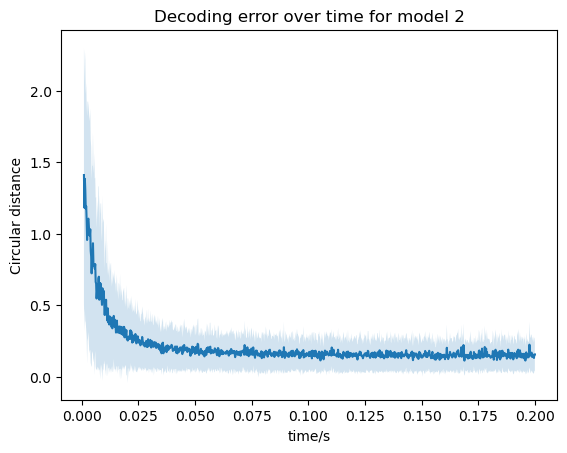

In [76]:
# ts = np.linspace(0.001, 0.2, 1000)
# avg_code_err = []
# std_code_err = []
# for t in tqdm(ts):
#     weights2_2 = model2.get_weights()
#     executioner2_2 = NetworkExecuter(W=weights2_2)
#     mean, std = average_decoding_error(executioner2_2, executioner2_2.pref, t=t)
#     avg_code_err.append(mean)
#     std_code_err.append(std)
# avg_code_err = np.array(avg_code_err)
# std_code_err = np.array(std_code_err)
# plt.title("Decoding error over time for model 2")
# plt.xlabel("time/s")
# plt.ylabel("Circular distance")
# plt.plot(ts, avg_code_err)
# plt.fill_between(ts, avg_code_err - std_code_err, avg_code_err + std_code_err, alpha=0.2)
# plt.show()


In [77]:
# print(average_decoding_error(executioner2_2, executioner2_2.pref, num=30000))

(0.1753678480208083, 0.1316401344907747)


100%|██████████| 1000/1000 [02:32<00:00,  6.55it/s]


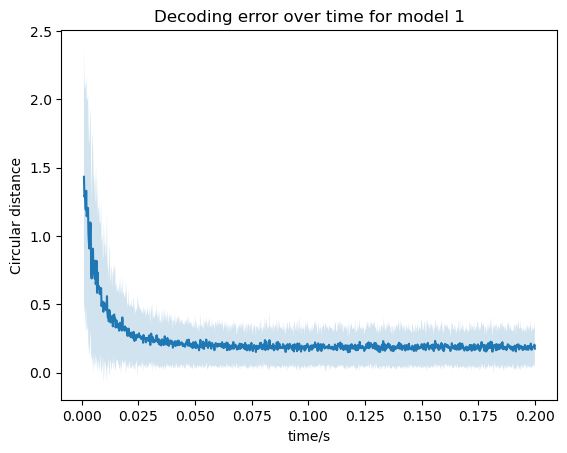

100%|██████████| 1000/1000 [02:25<00:00,  6.86it/s]


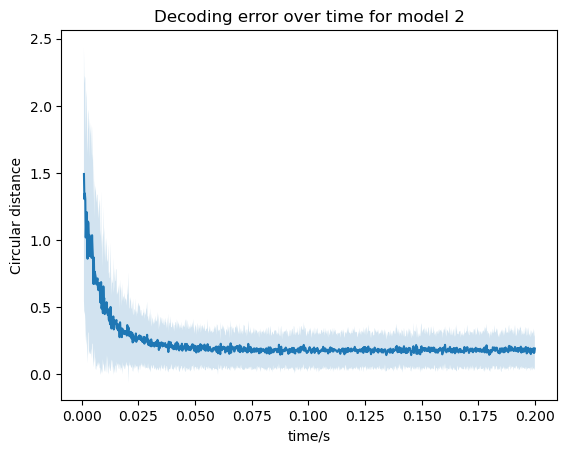

100%|██████████| 1000/1000 [02:22<00:00,  7.02it/s]


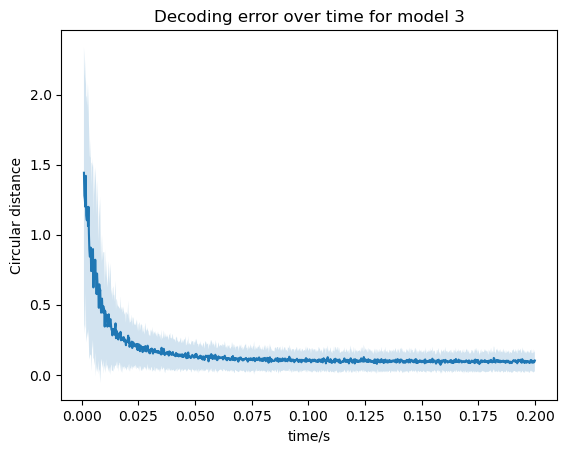

100%|██████████| 1000/1000 [04:09<00:00,  4.00it/s]


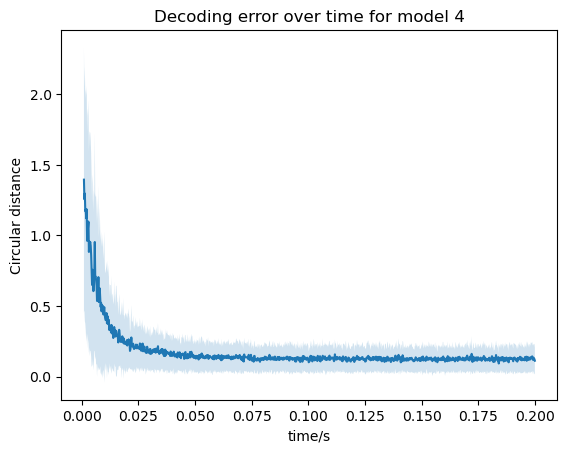

In [71]:
plot_over_time(executioner1, title="Decoding error over time for model 1")
plot_over_time(executioner2, title="Decoding error over time for model 2")
plot_over_time(executioner3, title="Decoding error over time for model 3")
plot_over_time(executioner4, title="Decoding error over time for model 4")

In [78]:
# SNR
def snr(executioner):
    signal = executioner.euler(t=0.2, orientation=np.pi)[:200]
    noise = np.abs(executioner.execute(t=0.2, orientation=np.pi) - signal)
    return sum(signal) / sum(noise)

print(snr(executioner=executioner1))
print(snr(executioner=executioner2))
# print(snr(executioner=executioner2_2))
print(snr(executioner=executioner3))
print(snr(executioner=executioner4))

0.4803547225983542
0.6798185656427488
0.7822115768146738
3.25148448504068
0.9670670042158677


In [80]:
temp = 0
for _ in range(100):
    weights2_2 = model2.get_weights()
    executioner2_2 = NetworkExecuter(W=weights2_2)
    temp += snr(executioner2_2)
temp / 100

0.6973935861131204

In [83]:
from scipy.stats import circvar

print(circvar(executioner1.euler(t=0.2, orientation=np.pi)))
print(circvar(executioner2.euler(t=0.2, orientation=np.pi)))
print(circvar(executioner3.euler(t=0.2, orientation=np.pi)))
print(circvar(executioner4.euler(t=0.2, orientation=np.pi)))

0.05056721322312874
0.1758764709030245
0.17012303193144995
0.07657972553711567


# Question 6 and 7 and 10

## Model 4

In [84]:
# Model 4

model4_2 = BalanceRingStructureWeights(alpha=5)
weights4_2 = model4_2.get_weights()
B = np.eye(400, 200)
C = np.eye(200, 400)
executioner4_2 = NetworkExecuter(W=weights4_2, B=B, C=C)

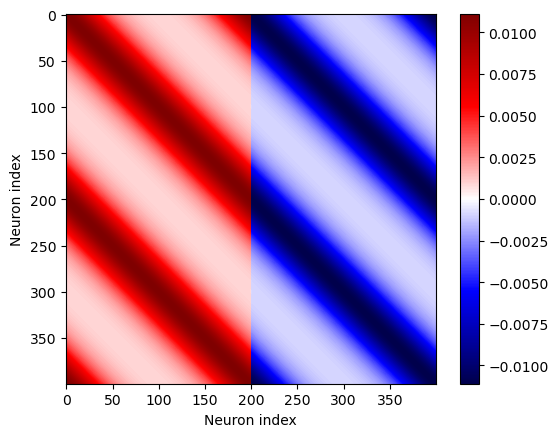

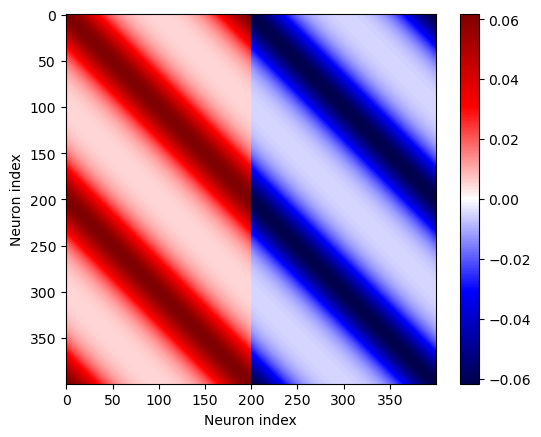

In [85]:
plot_weights(weights4)
plot_weights(weights4_2)

In [108]:
def plot_model4(executioner):
    ts = [0.01, 0.05, 0.1, 0.2]
    orientation = np.pi
    for t in ts:
        rate = executioner.euler(t, orientation)
        plt.plot(executioner.pref, rate[:200], label=f"r(t) at {t} seconds")
    plt.title(f"Response for model {3 + 1}: Excitatory")
    plt.xlabel("Preferred Orientation")
    plt.ylabel("Rate/Hz")
    plt.legend()
    plt.show()

    for t in ts:
        rate = executioner.euler(t, orientation)
        plt.plot(executioner.pref, rate[200:], label=f"r(t) at {t} seconds")
    plt.title(f"Response for model {3 + 1}: Inhibitory")
    plt.xlabel("Preferred Orientation")
    plt.ylabel("Rate/Hz")
    plt.legend()
    plt.show()

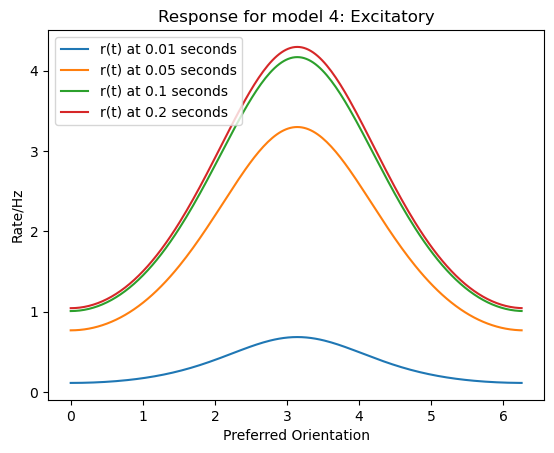

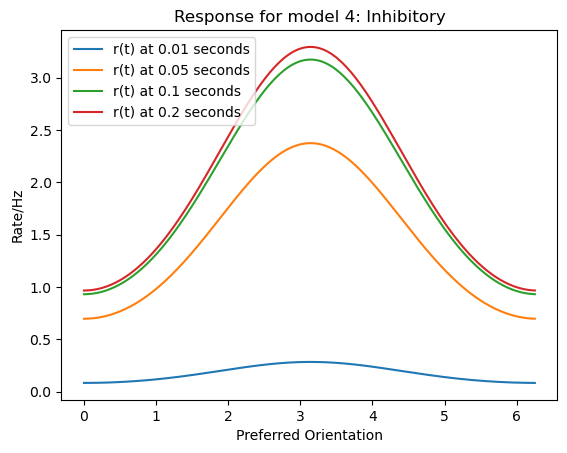

In [109]:
plot_model4(executioner=executioner4_2)

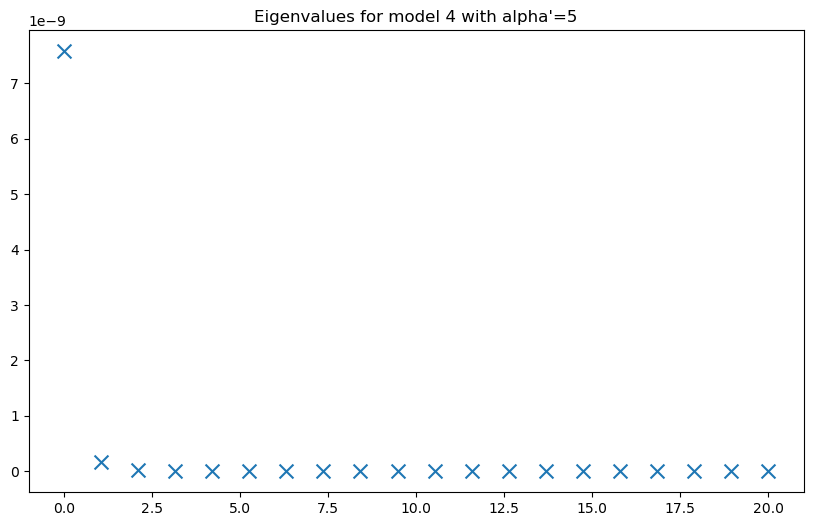

In [99]:
sort_plot_eigen(weights4_2, title="Eigenvalues for model 4 with alpha'=5")

100%|██████████| 1000/1000 [05:31<00:00,  3.02it/s]


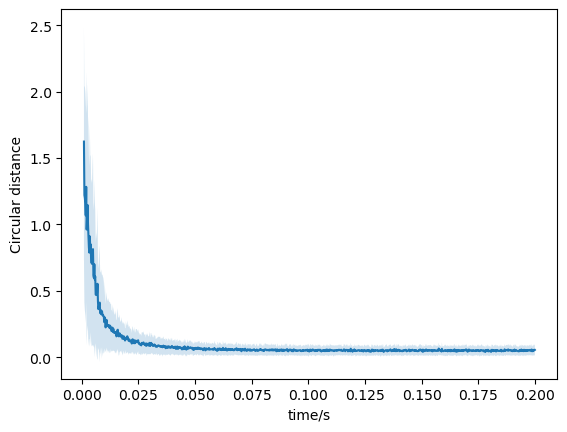

In [94]:
plot_over_time(executioner4_2)

In [102]:
model2_2 = RandomSymmetricConnectivityWeights(alpha=5)
model3_2 = SymmetricRingStructureWeights(alpha=5)
weights2_2 = model2_2.get_weights()
weights3_2 = model3_2.get_weights()
executioner2_2 = NetworkExecuter(W=weights2_2, alpha=5)
executioner3_2 = NetworkExecuter(W=weights3_2, alpha=5)

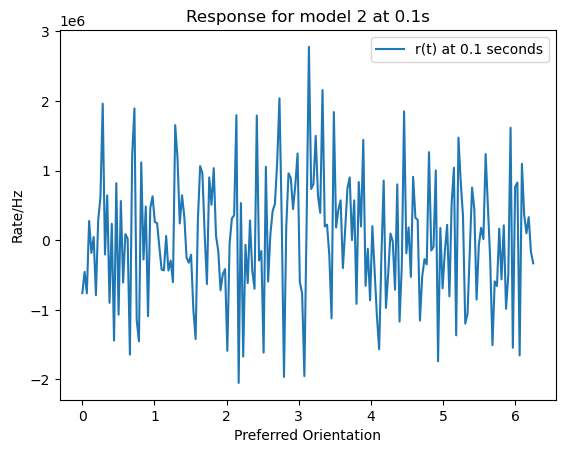

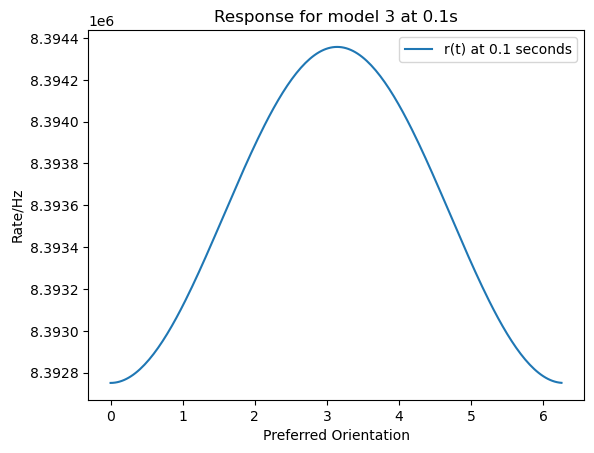

In [115]:
plot_response(executioner2_2, ts=[0.1], title="Response for model 2 at 0.1s")
plot_response(executioner3_2, ts=[0.1], title="Response for model 3 at 0.1s")

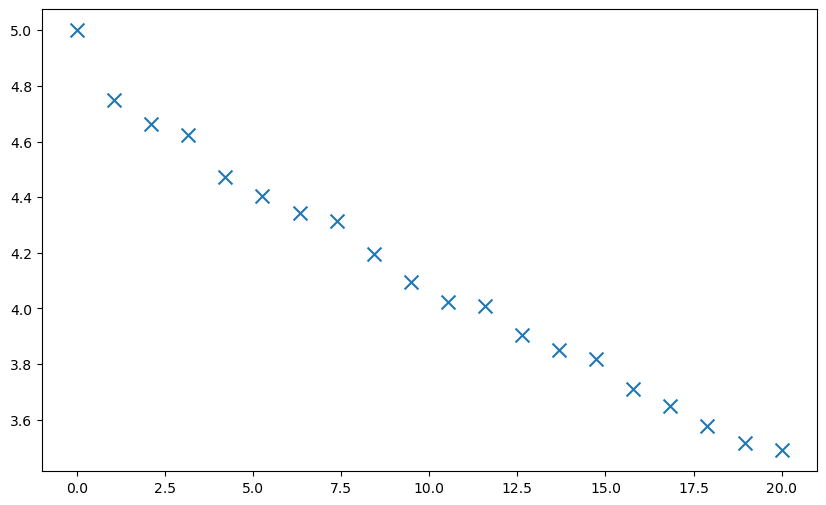

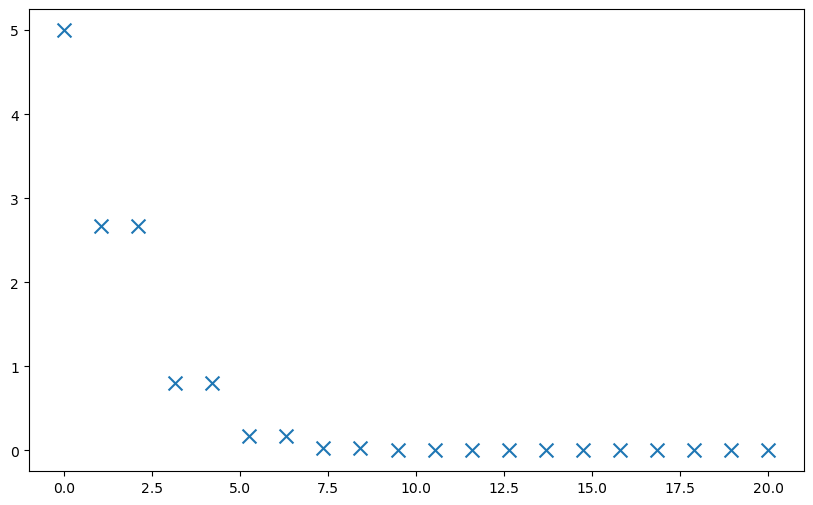

In [104]:
sort_plot_eigen(weights2_2)
sort_plot_eigen(weights3_2)

100%|██████████| 1000/1000 [02:44<00:00,  6.09it/s]


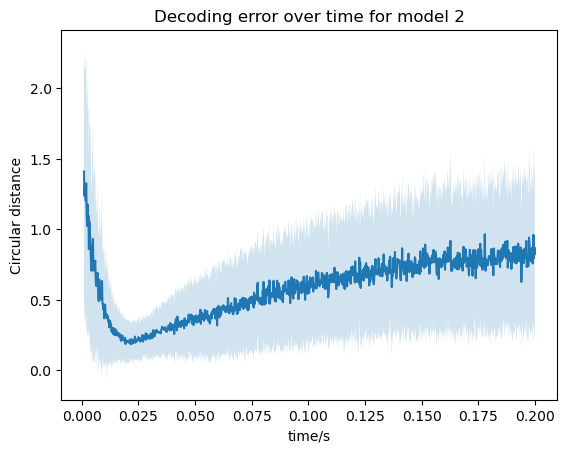

100%|██████████| 1000/1000 [02:39<00:00,  6.27it/s]


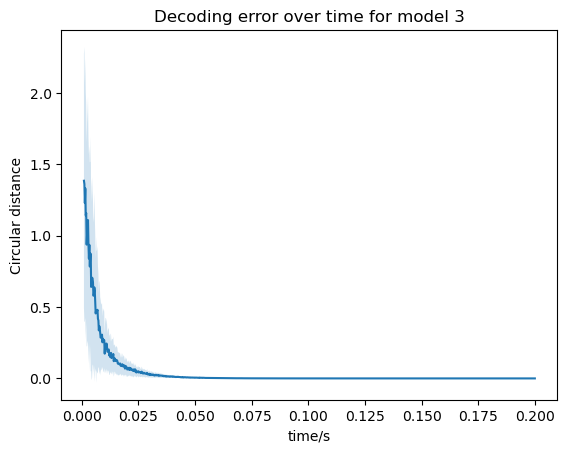

In [110]:
plot_over_time(executioner2_2, "Decoding error over time for model 2")
plot_over_time(executioner3_2, "Decoding error over time for model 3")

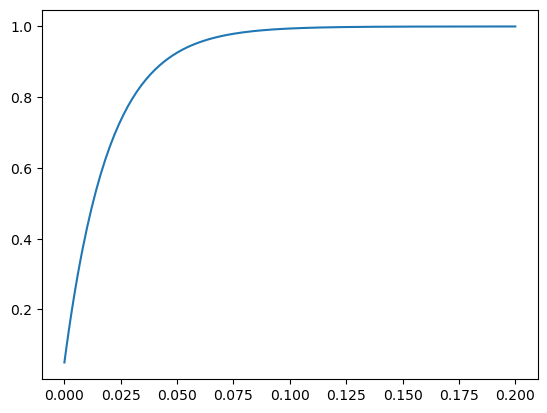

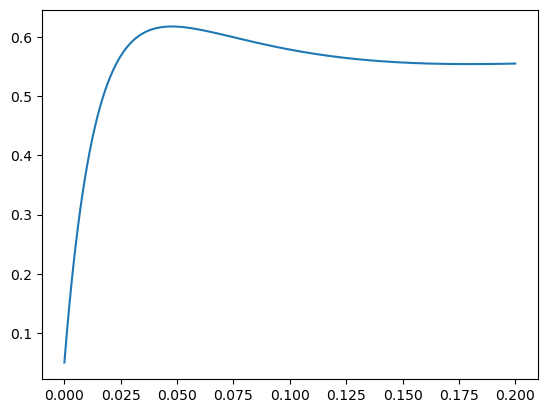

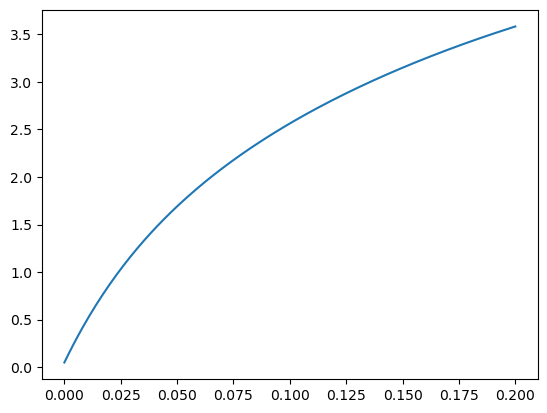

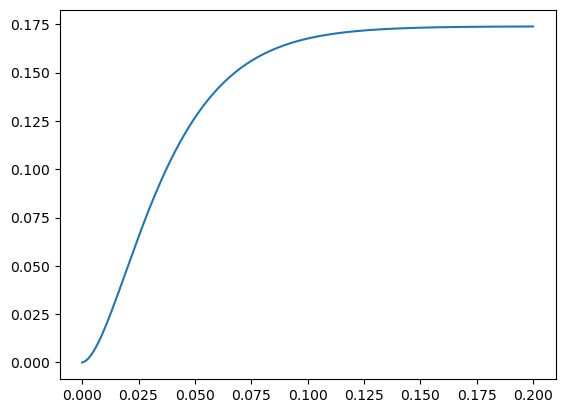

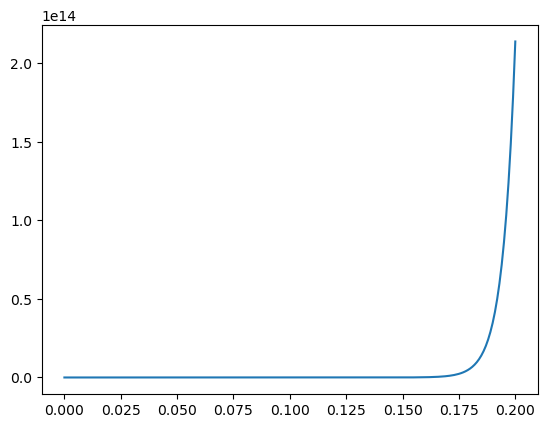

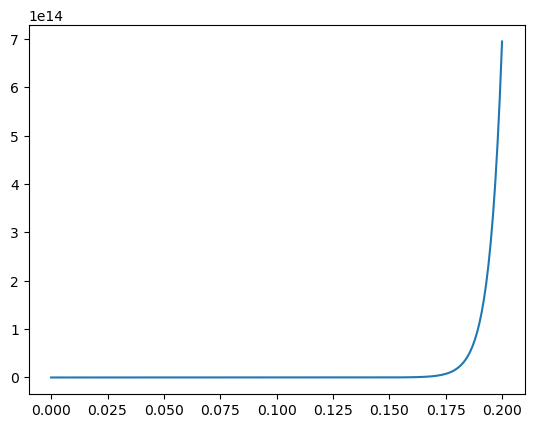

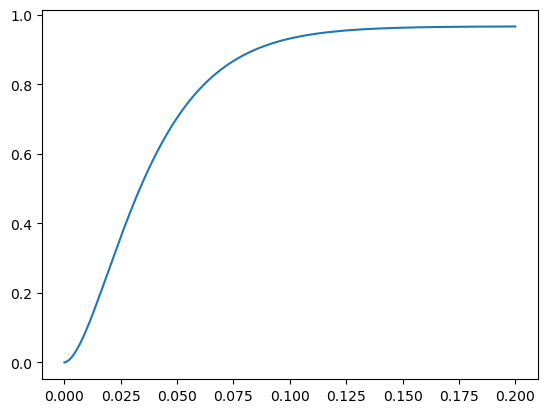

In [118]:
temp = executioner1.execute(t=0.2, orientation=np.pi, plot=True)
temp = executioner2.execute(t=0.2, orientation=np.pi, plot=True)
temp = executioner3.execute(t=0.2, orientation=np.pi, plot=True)
temp = executioner4.execute(t=0.2, orientation=np.pi, plot=True)

temp = executioner2_2.execute(t=0.2, orientation=np.pi, plot=True)
temp = executioner3_2.execute(t=0.2, orientation=np.pi, plot=True)
temp = executioner4_2.execute(t=0.2, orientation=np.pi, plot=True)

In [181]:
alphas = np.linspace(0.1, 1000, 100)
responses = []
for alpha in tqdm(alphas):
    model4_3 = BalanceRingStructureWeights(alpha=alpha)
    weights4_3 = model4_3.get_weights()
    B = np.eye(400, 200)
    C = np.eye(200, 400)
    executioner4_3 = NetworkExecuter(W=weights4_3, B=B, C=C)
    responses.append(executioner4_3.euler(t=0.2, orientation=np.pi)[100])

100%|██████████| 100/100 [00:08<00:00, 11.36it/s]


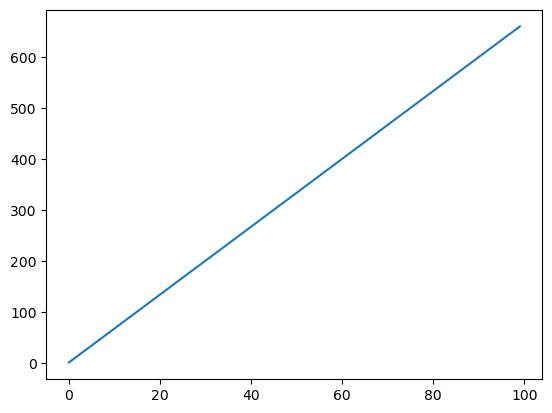

In [182]:
plt.plot(responses)

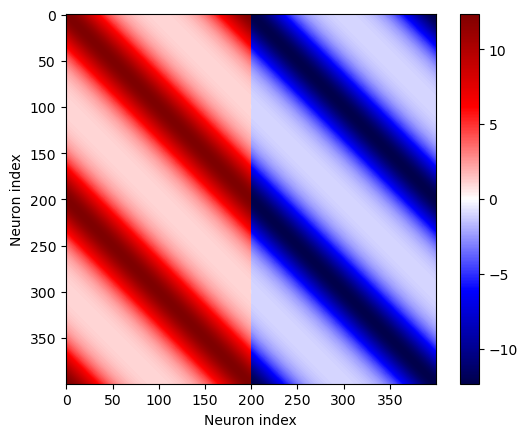

In [183]:
plot_weights(weights4_3)

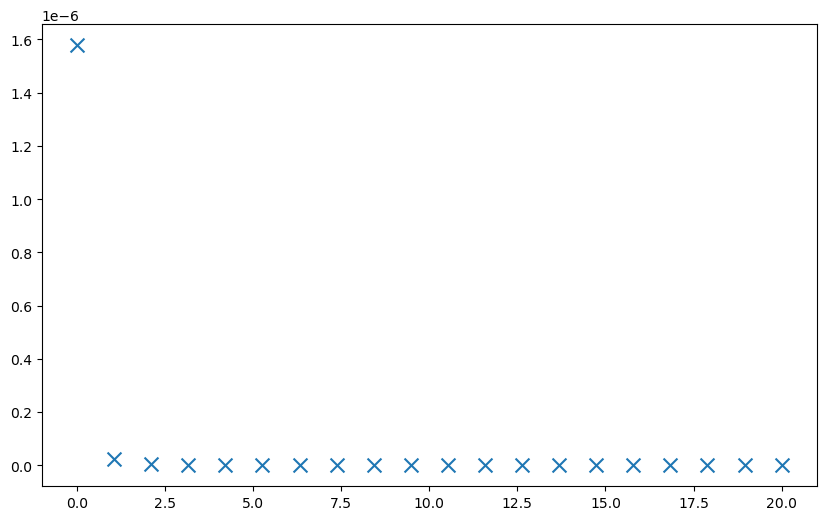

In [184]:
sort_plot_eigen(weights4_3)

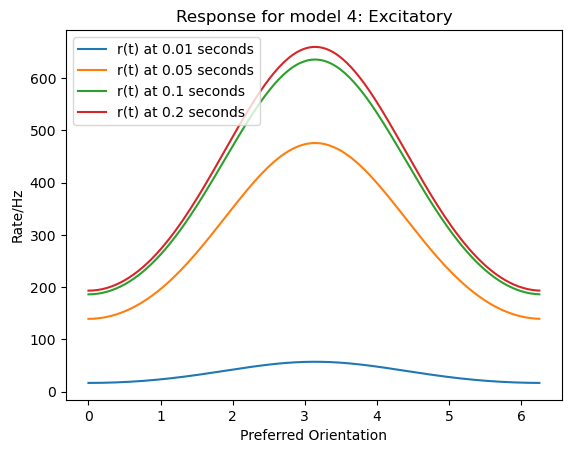

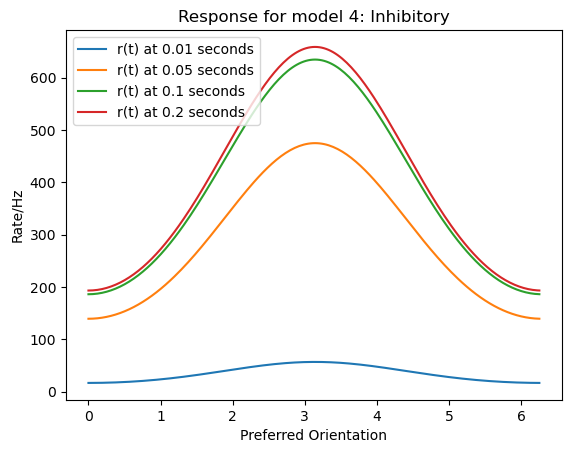

In [185]:
plot_model4(executioner4_3)

In [151]:
# Because the network is perfectly balance? lets try with alpha. Maybe something to do with contrast invariance?
B = np.eye(400, 200)
C = np.eye(200, 400)
model5 = ImbalanceRingStructureWeights(alpha=1000, alpha_inhib=999)
weights5 = model5.get_weights()
executioner5 = NetworkExecuter(W=weights5, B=B, C=C)

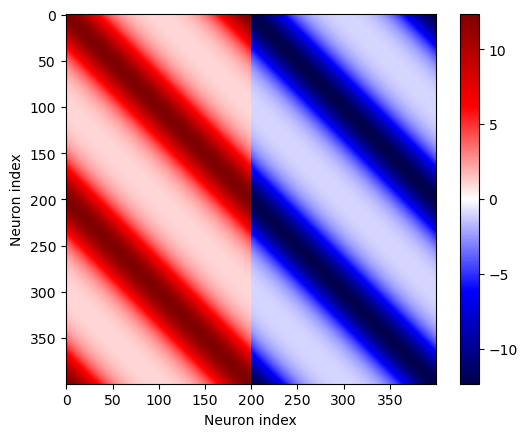

In [152]:
plot_weights(weights5)
# plot_over_time(executioner5)

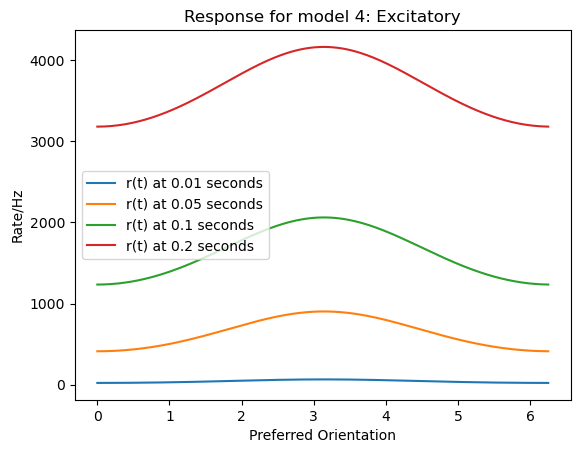

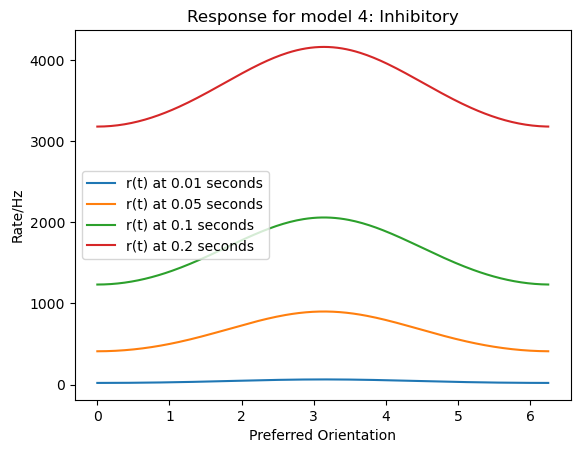

In [153]:
plot_model4(executioner5)

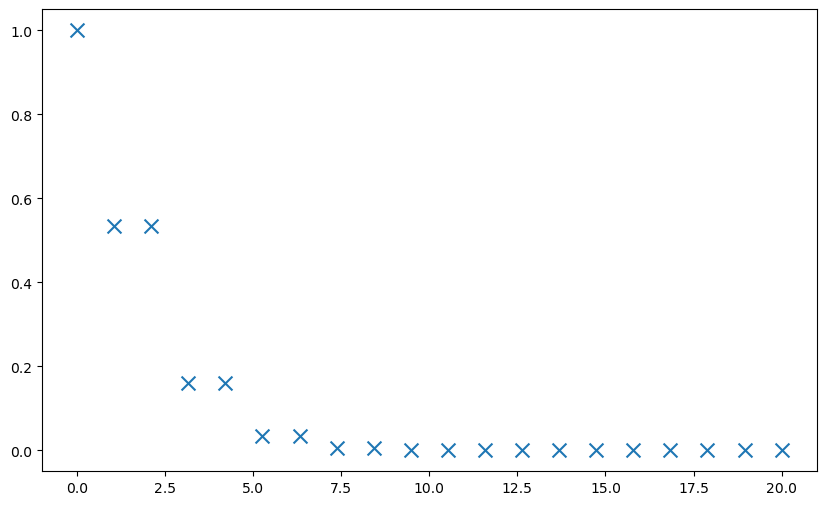

In [154]:
sort_plot_eigen(weights5)

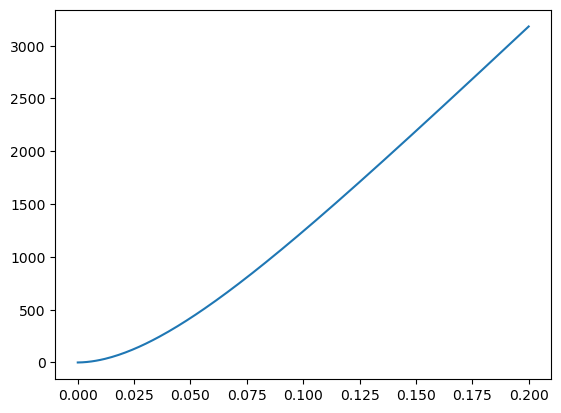

In [155]:
temp = executioner5.euler(0.2, np.pi, True)

# Question 8

In [156]:
symmetric_model = SymmetricRingStructureWeights(alpha=1)
B = np.concatenate((symmetric_model.get_weights(), np.zeros((200, 200))), axis=0)
C = np.eye(200, 400)
executioner4_4 = NetworkExecuter(W=weights4, B=B, C=C)

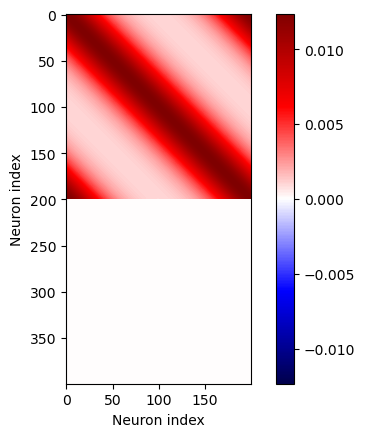

In [157]:
plot_weights(B)

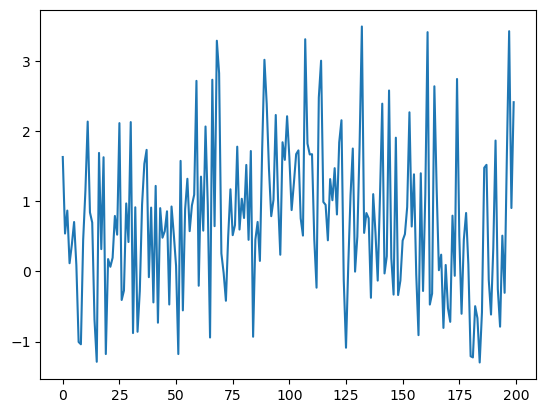

In [158]:
res = executioner4_4.execute(t=0.2, orientation=np.pi)
plt.plot(res)

In [159]:
# plot_over_time(executioner4_4)

In [160]:
# B = np.concatenate((np.eye(200), np.eye(200)), axis=0)
# C = np.eye(200, 400)
# executioner4_5 = NetworkExecuter(W=weights4, B=B, C=C)
# plot_over_time(executioner4_5)

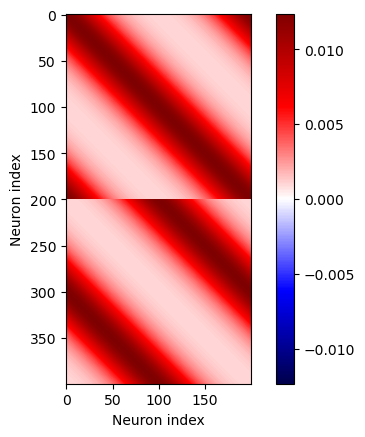

In [162]:
def cric_gauss_inverted(x):
    return np.exp((-np.cos(x) - 1) / (np.pi/4))

def pref_diff(pref_a, pref_b):
    return pref_b[None, :] - pref_a[:, None]

def spectral_abisca(A):
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("Need a square matrix")
    return np.max(np.real(np.linalg.eigvals(A)))

def scale_by_spectral_abisca(A, alpha=1):
    spec_ab = spectral_abisca(A)
    scale = spec_ab / alpha
    return A / scale

pref = np.linspace(0, 2*np.pi, 200, endpoint=False)
B_inverted_part = scale_by_spectral_abisca(cric_gauss_inverted(pref_diff(pref, pref)))
B = np.concatenate((symmetric_model.get_weights(), B_inverted_part), axis=0)
plot_weights(B)
C = np.eye(200, 400)
executioner4_6 = NetworkExecuter(W=weights4, B=B, C=C)
# plot_over_time(executioner4_6)

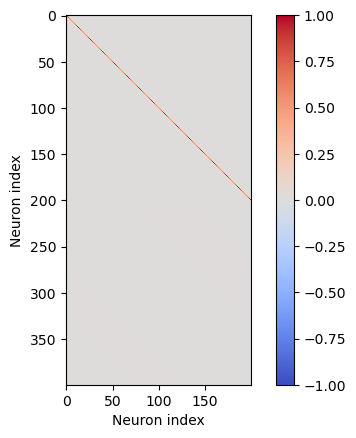

100%|██████████| 1000/1000 [05:29<00:00,  3.03it/s]


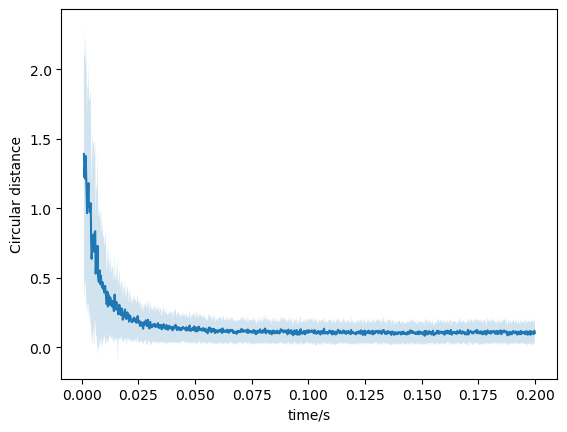

In [163]:
B = np.concatenate((np.eye(200), B_inverted_part), axis=0)
plt.imshow(B, cmap="coolwarm", vmin=-np.max(np.abs(np.array(B))), vmax=np.max(np.abs(np.array(B))))
plt.colorbar()
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()
C = np.eye(200, 400)
executioner4_7 = NetworkExecuter(W=weights4, B=B, C=C)
plot_over_time(executioner4_7)

In [167]:
print(circvar(executioner4_7.euler(t=0.2, orientation=np.pi)))
print(snr(executioner4_7))

0.07191408045659287
0.49090115837896187


In [165]:
print(average_decoding_error(executioner4, executioner4.pref, num=5000, t=0.2))
print(average_decoding_error(executioner4_7, executioner4_7.pref, num=5000, t=0.2))

(0.12333394730387974, 0.09459854058299359)
(0.10679031859360541, 0.08125862900421424)


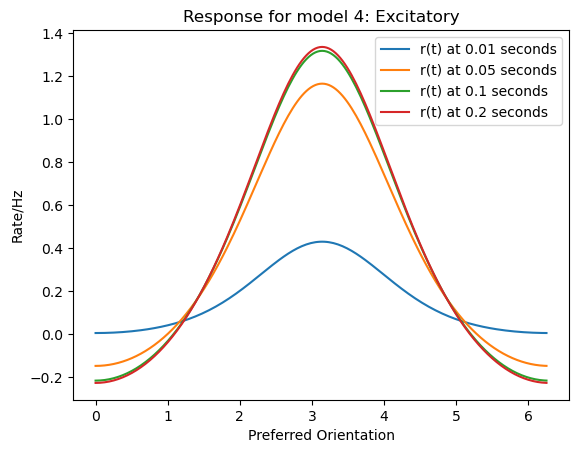

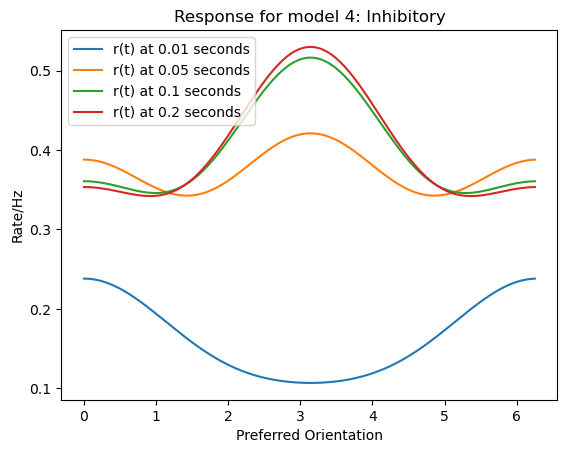

In [168]:
plot_model4(executioner4_7)

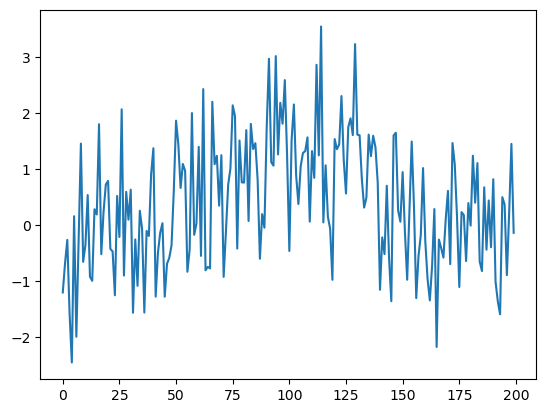

In [46]:
plt.plot(executioner4_7.execute(t=0.2, orientation=np.pi))

# Question 9

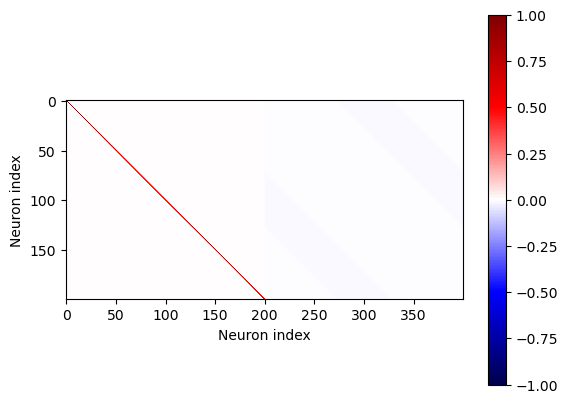

100%|██████████| 1000/1000 [05:22<00:00,  3.10it/s]


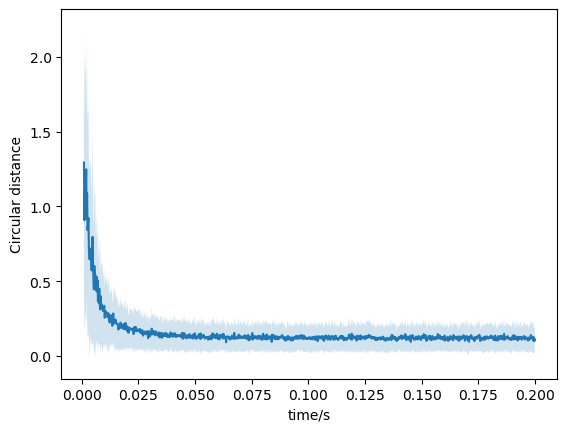

In [170]:
B = np.concatenate((np.eye(200), (np.eye(200))), axis=0)
C = np.concatenate((np.eye(200), -B_inverted_part), axis=1)
plt.imshow(C, cmap="seismic", vmin=-np.max(np.abs(np.array(C))), vmax=np.max(np.abs(np.array(C))))
plt.colorbar()
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()
executioner4_81 = NetworkExecuter(W=weights4, B=B, C=C)
plot_over_time(executioner4_81)

In [172]:
print(average_decoding_error(executioner4_81, executioner4_81.pref, num=30000, t=0.2))

(0.12164917113561269, 0.09245197006094982)


In [173]:
B = np.eye(400, 200)
C = np.concatenate((np.eye(200), np.eye(200)), axis=1)
executioner4_8 = NetworkExecuter(W=weights4, B=B, C=C)

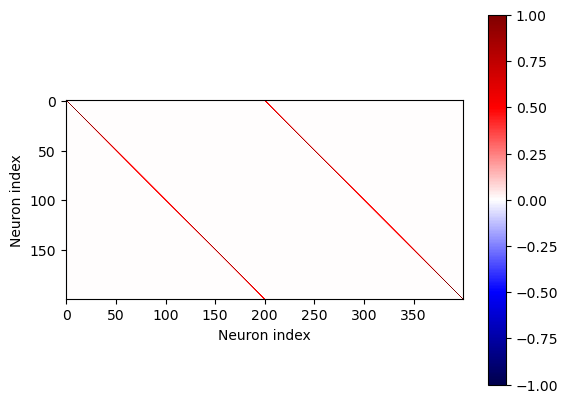

In [174]:
plot_weights(C)

100%|██████████| 1000/1000 [05:24<00:00,  3.08it/s]


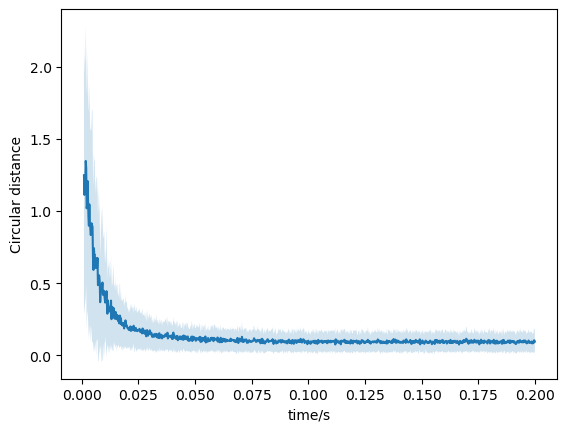

(0.09466330460102589, 0.07134410251552885)


In [175]:
plot_over_time(executioner4_8)
print(average_decoding_error(executioner4_8, executioner4_8.pref, num=5000, t=0.2))

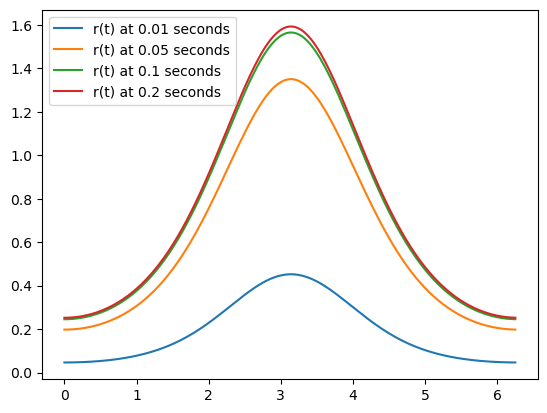

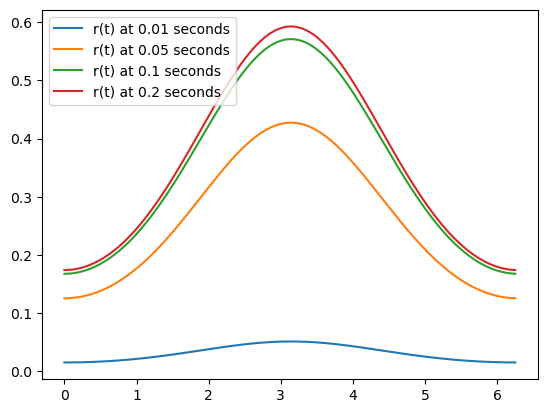

In [50]:
plot_model4(executioner4_8)

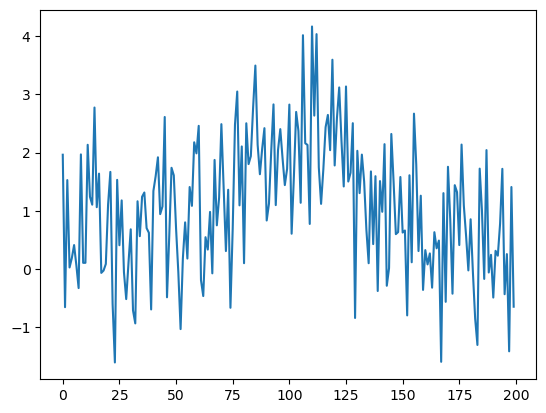

In [51]:
plt.plot(executioner4_8.execute(t=0.2, orientation=np.pi))

# Tuning Curves and Contrast Invariance

- model1
- model2
- model3
- model4
- model4_2
- model4_3

In [91]:
executioners = [
    executioner1,
    executioner2,
    executioner3,
    executioner4,
    # executioner4_2,
    # executioner4_3,

    # executioner4_7
]

In [92]:
def neuro_SVD(tuning_curve):
    U, S, Vt = np.linalg.svd(tuning_curve)
    k = 1 # number of singular values to keep
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    reduced_neuron = np.dot(U_k, np.dot(S_k, Vt_k))

    residue = tuning_curve - reduced_neuron
    return reduced_neuron, residue, S

def get_all_fraction_of_variance(responses):
    frac_of_vars = []
    for tuning_curve in responses:
        _, _, S = neuro_SVD(tuning_curve)
        # frac_of_var = (np.linalg.norm(S[1:]) ** 2) / (np.linalg.norm(S) ** 2)
        frac_of_var = (np.linalg.norm(S[0]) ** 2) / (np.linalg.norm(S) ** 2)
        frac_of_vars.append(frac_of_var)
    return frac_of_vars


def plot_frac_of_var(tuning_curves, title="", bin_size=0.001):
    frac_of_vars = get_all_fraction_of_variance(tuning_curves)
    bins = np.arange(0, 1 + bin_size, bin_size)
    plt.hist(frac_of_vars, bins, bottom=0, width=bin_size, color="cadetblue")
    # plt.xticks(np.arange(0, 1 + bin_size, bin_size * 20))
    plt.xlim(0.99, 1)
    plt.title(title)
    plt.xlabel("Fraction of data explained by first SV")
    plt.ylabel("Unit count")
    plt.show()


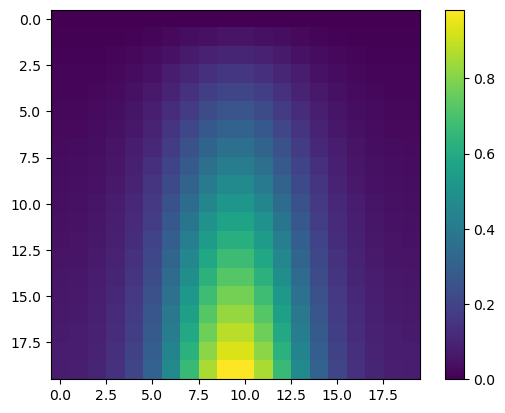

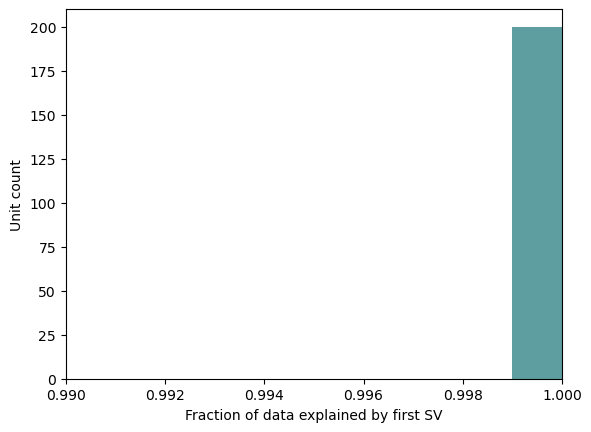

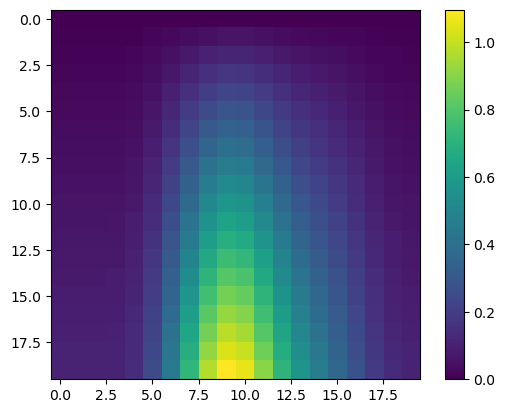

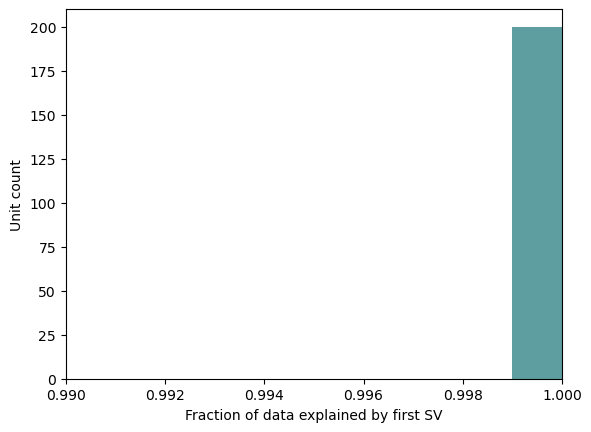

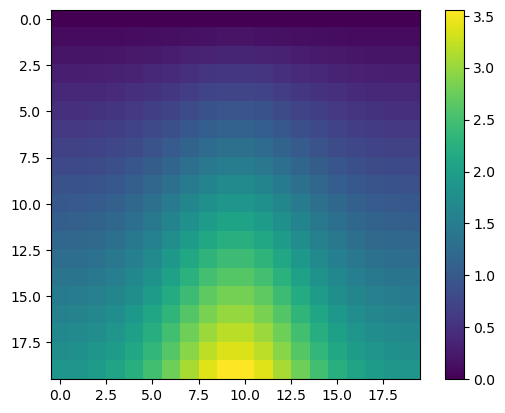

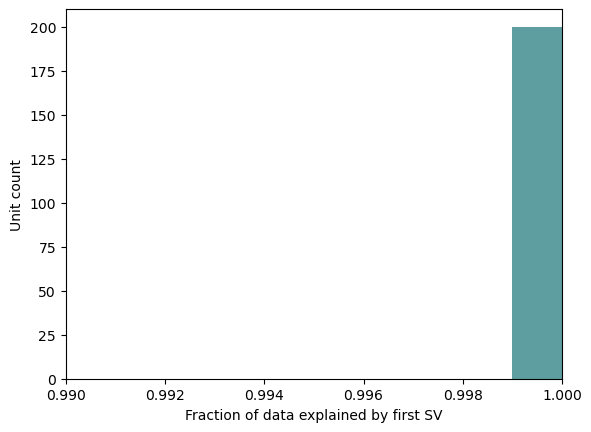

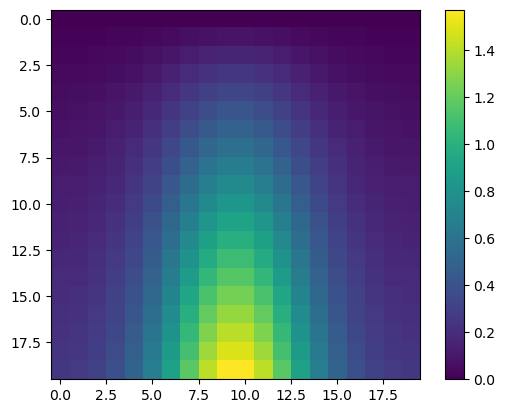

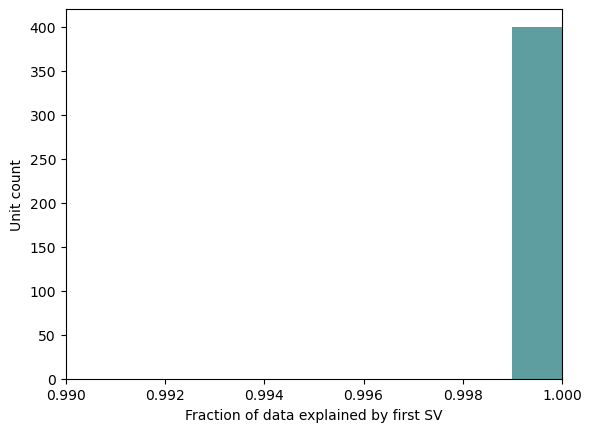

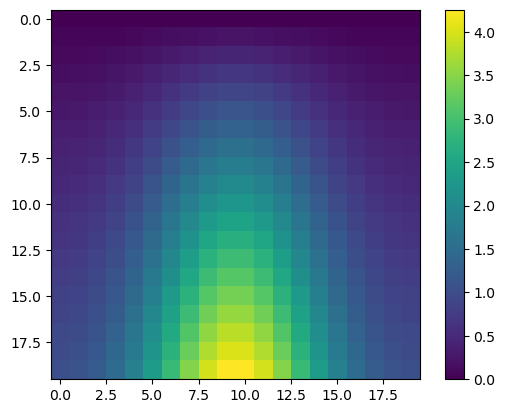

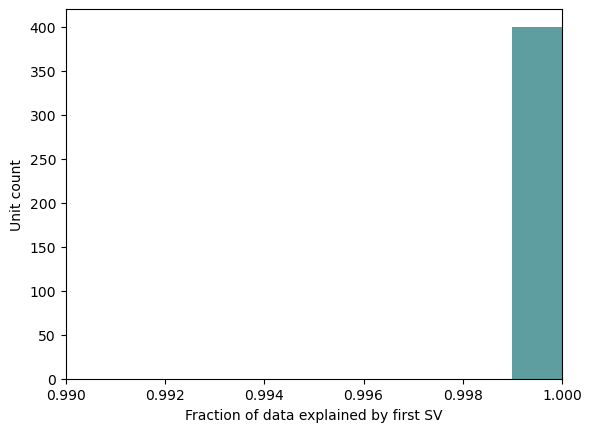

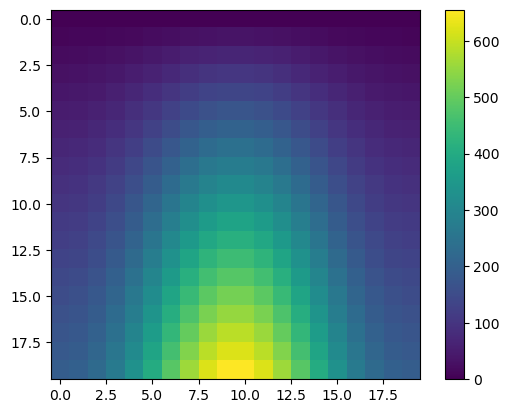

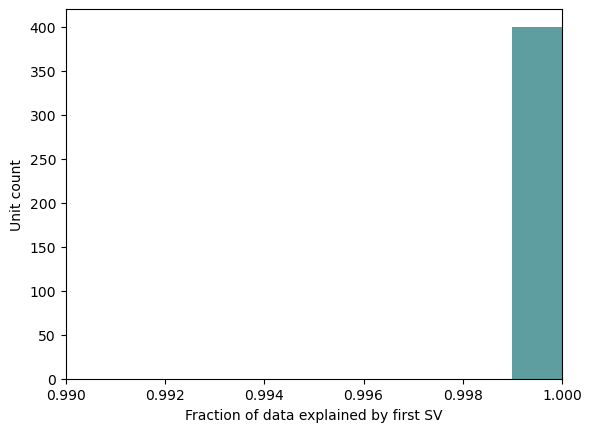

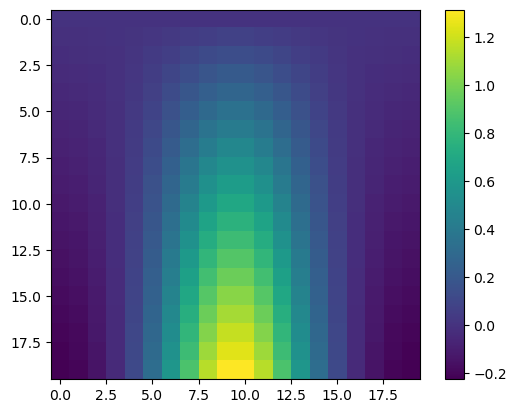

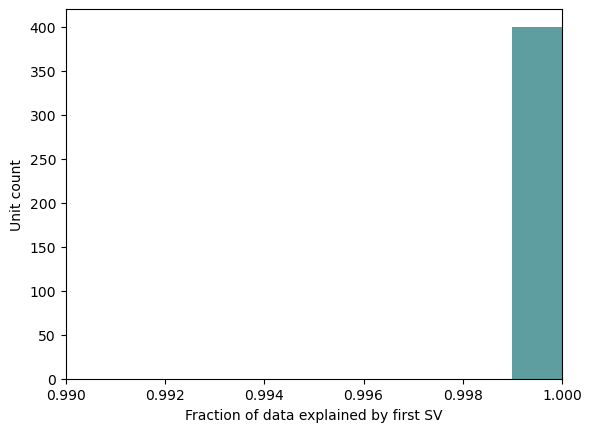

In [93]:
for executioner in executioners:
    res = np.array(executioner.run_all_orientation_and_contrast()).transpose(2, 0, 1)
    plt.imshow(res[100])
    plt.colorbar()
    plt.show()

    plot_frac_of_var(res)

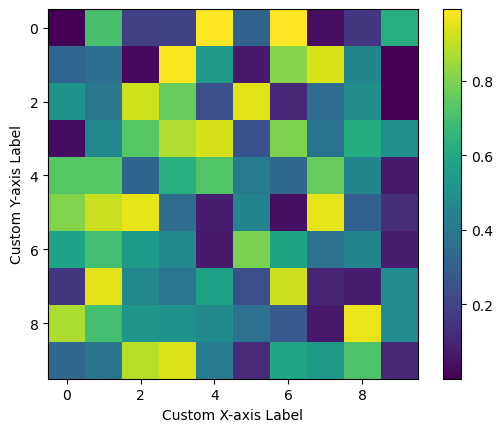

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.rand(10, 10)

# Plotting the data with imshow
plt.imshow(data, cmap='viridis')

# Customizing x-axis
plt.xticks(np.arange(0, 10, 2), ['0', '2', '4', '6', '8'])  # Setting ticks at every 2 units
plt.xlabel('Custom X-axis Label')

# Customizing y-axis
plt.yticks(np.arange(0, 10, 2), ['0', '2', '4', '6', '8'])  # Setting ticks at every 2 units
plt.ylabel('Custom Y-axis Label')

plt.colorbar()  # Add color bar for reference
plt.show()
